<a href="https://colab.research.google.com/github/Albinsaji0/Cancer_Detection/blob/main/cnn_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import os

base_dir = '/content/drive/MyDrive/ctscan_images'

print("Contents of base directory:")
print(os.listdir(base_dir))

print("\nContents of train directory:")
print(os.listdir(f'{base_dir}/train'))

print("\nContents of validation directory:")
validation_dir = os.path.join(base_dir, 'test')


Contents of base directory:
['.DS_Store', 'test', 'train']

Contents of train directory:
['.DS_Store', 'normal', 'large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa']

Contents of validation directory:


In [3]:
import os

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Directory with training cat/dog pictures
train_lung_cancer = os.path.join(train_dir, 'lung_cancer')
train_normal= os.path.join(train_dir, 'normal')

# Directory with validation cat/dog pictures
validation_lung_cancer = os.path.join(validation_dir, 'lung_cancer')
validation_normal = os.path.join(validation_dir, 'normal')

In [5]:
print('total training lung cancer images :', len(os.listdir(  train_lung_cancer ) ))
print('total training normal images :', len(os.listdir(  train_normal ) ))

print('total validation lung caacer images :', len(os.listdir( train_lung_cancer ) ))
print('total validation normal images :', len(os.listdir( train_normal ) ))

total training lung cancer images : 136
total training normal images : 151
total validation lung caacer images : 136
total validation normal images : 151


In [6]:
%matplotlib inline

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

pic_index = 0 # Index for iterating over images

In [7]:
train_lung_cancer_fnames = os.listdir( train_lung_cancer )
train_normal_fnames = os.listdir( train_normal )

print(train_lung_cancer_fnames[:10])
print(train_normal_fnames[:10])

['000039 (4).png', '000059 (3).png', '000016 (4).png', 'l3.png', '000051.png', '000043 (2).png', '000115 (3).png', '000076 (3).png', 'l2.png', '000031 (2).png']
['n9 (2) - Copy.jpg', '11.png', '8 - Copy (3).png', '6 (2) - Copy.png', '13.png', '2 - Copy.png', 'n6 (2) - Copy.jpg', '18 - Copy - Copy.png', '17 (2).png', '6 - Copy (2).png']


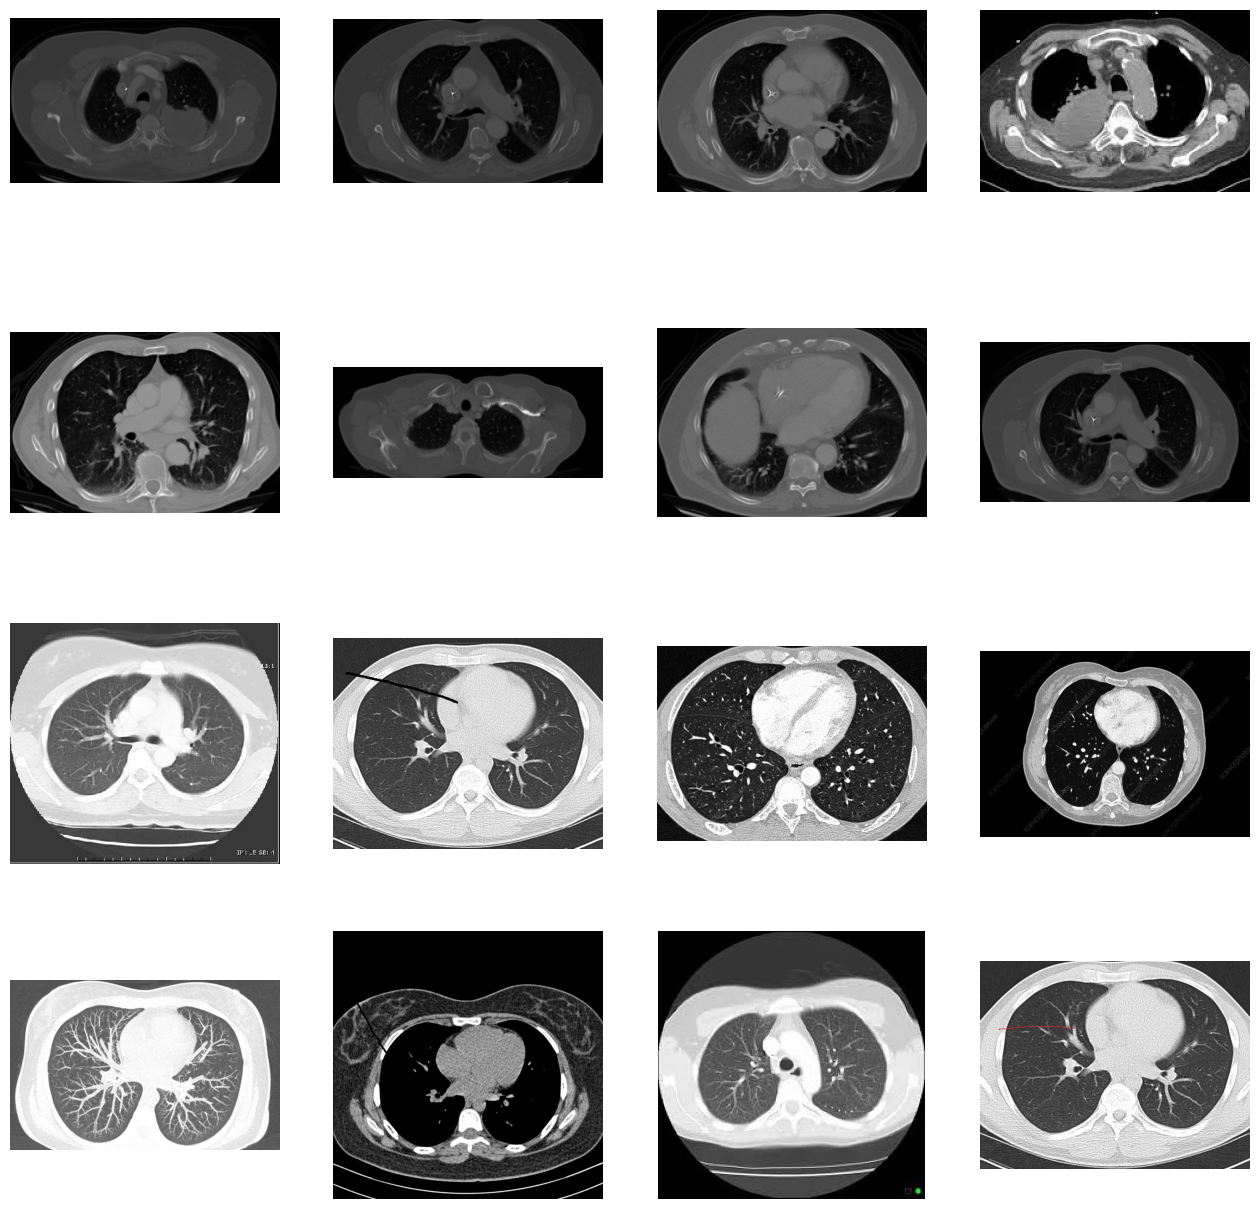

In [8]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)

pic_index+=8

next_cat_pix = [os.path.join(train_lung_cancer, fname)
                for fname in  train_lung_cancer_fnames[ pic_index-8:pic_index]
               ]

next_dog_pix = [os.path.join(train_normal, fname)
                for fname in train_normal_fnames[ pic_index-8:pic_index]
               ]

for i, img_path in enumerate(next_cat_pix+next_dog_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [9]:
import tensorflow as tf

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 18496)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     9,470,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,494,561 (36.22 MB)

 Trainable params: 9,494,561 (36.22 MB)

 Non-trainable params: 0 (0.00 B)

In [11]:
from tensorflow.keras.optimizers import RMSprop

model.compile(optimizer=RMSprop(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics = ['accuracy'])

In [16]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255.
train_datagen = ImageDataGenerator(rescale=1.0/255.)
test_datagen = ImageDataGenerator(rescale=1.0/255.)

# --------------------
# Flow training images in batches of 20 using train_datagen generator
# --------------------
train_generator = train_datagen.flow_from_directory(
    train_dir,
    batch_size=20,
    class_mode='binary',
    target_size=(150, 150)
)

# --------------------
# Flow validation images in batches of 20 using test_datagen generator
# --------------------
validation_dir = '/content/drive/MyDrive/ctscan_images/test'

validation_generator = test_datagen.flow_from_directory(
    validation_dir,  # <-- make sure validation_dir = base_dir/test
    batch_size=20,
    class_mode='binary',
    target_size=(150, 150)
)


Found 287 images belonging to 2 classes.
Found 105 images belonging to 2 classes.


In [17]:
history = model.fit(
            train_generator,
            epochs=15,
            validation_data=validation_generator,
            verbose=2
            )

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
15/15 - 45s - 3s/step - accuracy: 0.5470 - loss: 0.6848 - val_accuracy: 0.5238 - val_loss: 0.5085
Epoch 2/15
15/15 - 13s - 836ms/step - accuracy: 0.8153 - loss: 0.4224 - val_accuracy: 0.5714 - val_loss: 0.8676
Epoch 3/15
15/15 - 12s - 810ms/step - accuracy: 0.9373 - loss: 0.1890 - val_accuracy: 0.9143 - val_loss: 0.2222
Epoch 4/15
15/15 - 11s - 741ms/step - accuracy: 0.9477 - loss: 0.1742 - val_accuracy: 0.9714 - val_loss: 0.0687
Epoch 5/15
15/15 - 11s - 758ms/step - accuracy: 0.9965 - loss: 0.0331 - val_accuracy: 0.9810 - val_loss: 0.0506
Epoch 6/15
15/15 - 12s - 820ms/step - accuracy: 1.0000 - loss: 0.0097 - val_accuracy: 0.9810 - val_loss: 0.0333
Epoch 7/15
15/15 - 12s - 817ms/step - accuracy: 1.0000 - loss: 0.0033 - val_accuracy: 0.9810 - val_loss: 0.0294
Epoch 8/15
15/15 - 12s - 812ms/step - accuracy: 1.0000 - loss: 0.0019 - val_accuracy: 0.9810 - val_loss: 0.0290
Epoch 9/15
15/15 - 11s - 725ms/step - accuracy: 1.0000 - loss: 4.8468e-04 - val_accuracy: 0.9810 - val_loss

In [18]:
import numpy as np

from google.colab import files
from tensorflow.keras.utils import load_img, img_to_array

uploaded=files.upload()

for fn in uploaded.keys():

  # predicting images
  path='/content/' + fn
  img=load_img(path, target_size=(150, 150))

  x=img_to_array(img)
  x /= 255
  x=np.expand_dims(x, axis=0)
  images = np.vstack([x])

  classes = model.predict(images, batch_size=10)

  print(classes[0])

  if classes[0][0]>0.5:
    print(fn + " is a normal case")
  else:
    print(fn + " is a lung cancer case")

Saving 000015.png to 000015.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step
[0.00026104]
000015.png is a lung cancer case


In [19]:
# Plot training results
import pandas as pd
model_loss= pd.DataFrame(history.history)
model_loss


,accuracy,loss,val_accuracy,val_loss
0,0.547038,0.684835,0.523810,0.508508
1,0.815331,0.422372,0.571429,0.867561
2,0.937282,0.189026,0.914286,0.222177
3,0.947735,0.174155,0.971429,0.068658
4,0.996516,0.033114,0.980952,0.050585
5,1.000000,0.009683,0.980952,0.033342
6,1.000000,0.003297,0.980952,0.029391
7,1.000000,0.001855,0.980952,0.028999
8,1.000000,0.000485,0.980952,0.029240
9,0.930314,0.951146,0.990476,0.030502


<Axes: >

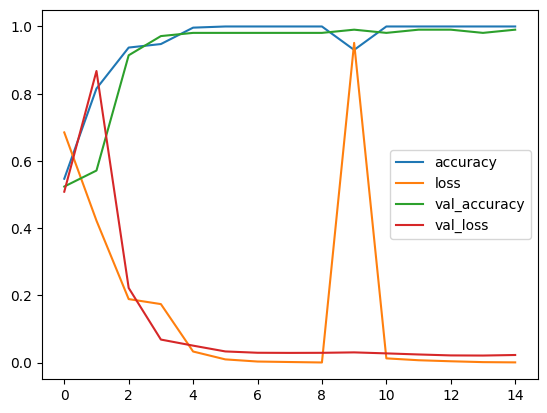

In [20]:
model_loss.plot()

In [21]:
import matplotlib.pyplot as plt

def plot_loss_acc(history):
  '''Plots the training and validation loss and accuracy from a history object'''
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs = range(len(acc))

  plt.plot(epochs, acc, 'r', label='Training accuracy')
  plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
  plt.title('Training and validation accuracy')

  plt.figure()

  plt.plot(epochs, loss, 'r', label='Training Loss')
  plt.plot(epochs, val_loss, 'b', label='Validation Loss')
  plt.title('Training and validation loss')
  plt.legend()

  plt.show()

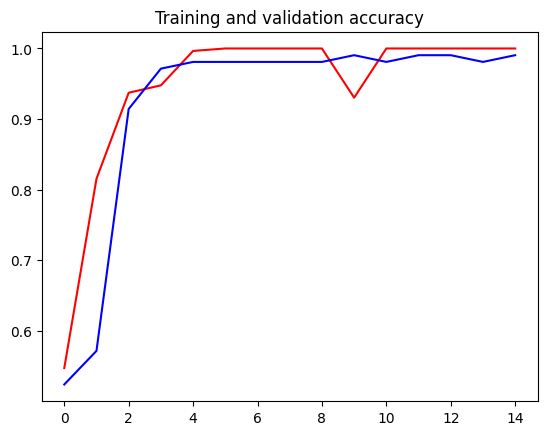

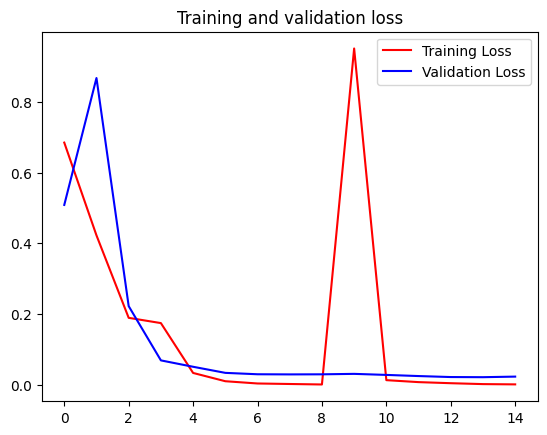

In [22]:
# Plot training results
plot_loss_acc(history)

In [23]:
from keras.models import load_model
model.save("lungcancer_model_cnn.h5")